In [1]:
import pandas as pd
import numpy as np

# ML libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load data
linus_tracks = pd.read_csv('data/linus_tracks.csv')
maxwell_tracks = pd.read_csv('data/maxwell_songs.csv')
maxwell_tracks['name'] = 'maxwell'

# Combine and clean data
combined_tracks = pd.concat([linus_tracks, maxwell_tracks], ignore_index=True)
combined_tracks = combined_tracks.drop(columns=['track.name', 'type', 'id', 'uri', 'track_href', 'analysis_url'])

# Display general information about DataFrame
print(combined_tracks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      400 non-null    float64
 1   energy            400 non-null    float64
 2   key               400 non-null    int64  
 3   loudness          400 non-null    float64
 4   mode              400 non-null    int64  
 5   speechiness       400 non-null    float64
 6   acousticness      400 non-null    float64
 7   instrumentalness  400 non-null    float64
 8   liveness          400 non-null    float64
 9   valence           400 non-null    float64
 10  tempo             400 non-null    float64
 11  duration_ms       400 non-null    int64  
 12  time_signature    400 non-null    int64  
 13  name              400 non-null    object 
dtypes: float64(9), int64(4), object(1)
memory usage: 43.9+ KB
None


## Data exploration

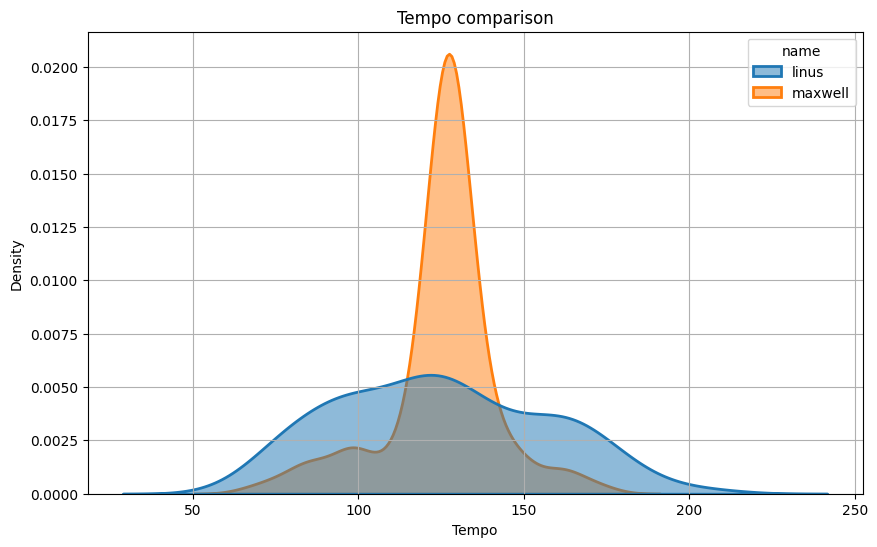

In [17]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Creating overlapping density plots
sns.kdeplot(data=combined_tracks, x='tempo', hue='name', fill=True, alpha=0.5, linewidth=2)

# Set the title and labels
plt.title('Tempo comparison')
plt.xlabel('Tempo')
plt.ylabel('Density')
plt.grid(True)  # Adding a grid for better readability of the plot

# Show the plot with the legend automatically included
plt.show()

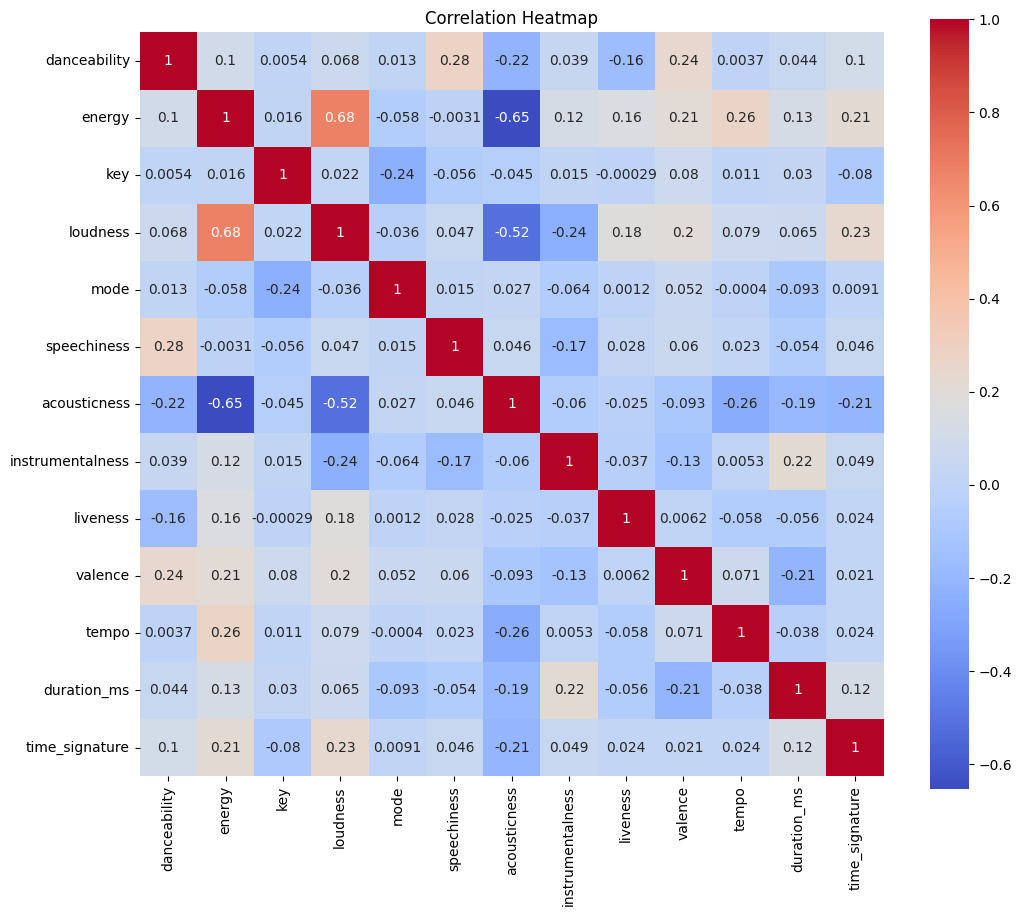

In [13]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(combined_tracks.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Split data
X = combined_tracks.drop('name', axis=1)
y = combined_tracks['name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Preprocessing and modeling pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Decision Tree model
tree_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', DecisionTreeClassifier(random_state=123))])

# Fit model
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Similarly, you can define pipelines for Bagging, Random Forest, and Gradient Boosting
# and use GridSearchCV for tuning as shown in the Decision Tree example.

# Visualization and comparison of model performance can be achieved using matplotlib.
